In [1]:
import numpy as np
import anndata as ann
import pandas as pd
import scanpy as sc
import scvelo as scv
import scipy as sp
import matplotlib.pyplot as pl
import matplotlib.pylab as pit
import leidenalg
import bbknn
import seaborn as sb
import scrublet as scr
from IPython.core.display import display, HTML
from matplotlib import rcParams

In [2]:
adata=sc.read('/Users/Chiara/Documents/PhD/Project_primary_resistance/scRNAseq/10x_5_treatment_data_v3/T cells/data/Overlay_treatment_preprocessing_t_cells_bbknn_V01-sb.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 3280 × 11162
    obs: 'batch', 'batch_key', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'phase', 'S_score', 'G2M_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'log_total_counts', 'log_pct_counts_ribo', 'log_pct_counts_mito', 'samples2', 'leiden', 'samples'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo', 'n_counts', 'highly_variable', 'mea

In [4]:
file_path = '/Users/Chiara/Documents/PhD/Project_primary_resistance/scRNAseq/10x_5_treatment_data_v3/T cells'

In [5]:
sc.settings.figdir = file_path + '/figures/'

In [6]:
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True, transparent=True, color_map='viridis')

In [7]:
sc.tl.leiden(adata, resolution=1.8) 

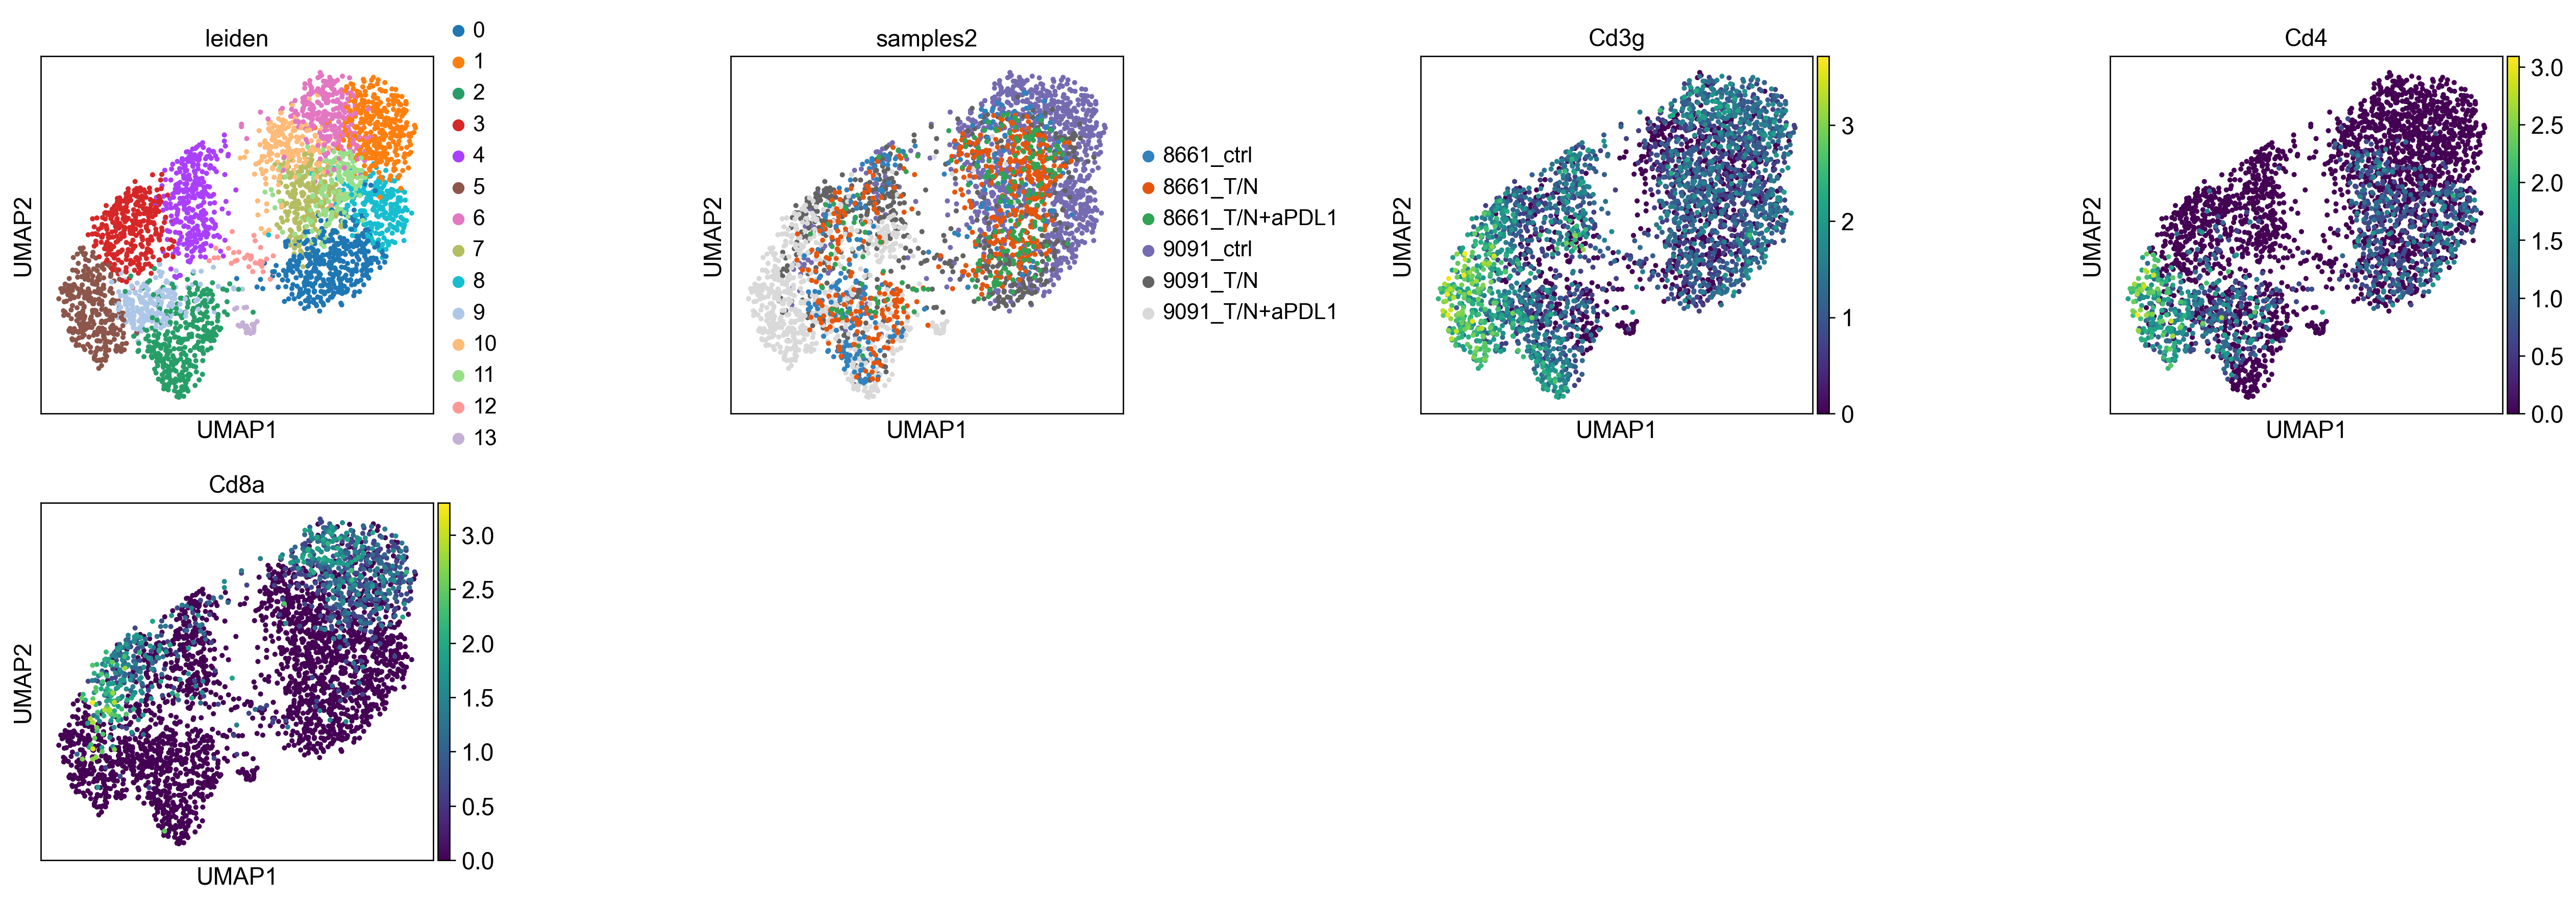

In [8]:
sc.pl.umap(adata, color=['leiden','samples2','Cd3g','Cd4','Cd8a'], wspace=0.6,save='_cd4cd8') 

### Quantification number of cells

#### number of cells per condition

### Classical

##### Control

In [80]:
adata[(adata.obs['samples2']=='8661_ctrl'),:].shape[0]

264

##### T+N

In [81]:
adata[(adata.obs['samples2']=='8661_T/N'),:].shape[0]

506

##### T+N+anti PD-L1

In [82]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1'),:].shape[0]

201

### Mesenchymal

##### Control

In [83]:
adata[(adata.obs['samples2']=='9091_ctrl'),:].shape[0]

1053

##### T+N

In [84]:
adata[(adata.obs['samples2']=='9091_T/N'),:].shape[0]

579

##### T+N+anti PD-L1

In [85]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1'),:].shape[0]

677

### Subpopulation analysis

#### Classical

##### Control

Effector T cells

In [104]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.25757575757575757

Cytotoxic T cells

In [105]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.07954545454545454

CD4+ T cells

In [106]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.24621212121212122

CD8+ T cells

In [107]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.14015151515151514

Central memory T cells

In [108]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.12121212121212122

Regulatory T cells

In [109]:
adata[(adata.obs['samples2']=='8661_ctrl') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_ctrl')].shape[0]

0.1553030303030303

##### T+N

Effector T cells

In [110]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.13438735177865613

Cytotoxic T cells

In [111]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.09288537549407115

CD4+ T cells

In [112]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.5316205533596838

CD8+ T cells

In [113]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.1067193675889328

Central memory T cells

In [114]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.05731225296442688

Regulatory T cells

In [115]:
adata[(adata.obs['samples2']=='8661_T/N') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N')].shape[0]

0.07707509881422925

##### T+N+anti PD-L1

Effector T cells

In [116]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.06467661691542288

Cytotoxic T cells

In [117]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.07462686567164178

CD4+ T cells

In [118]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.572139303482587

CD8+ T cells

In [119]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.1890547263681592

Central memory T cells

In [120]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.03980099502487562

Regulatory T cells

In [121]:
adata[(adata.obs['samples2']=='8661_T/N+aPDL1') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='8661_T/N+aPDL1')].shape[0]

0.05970149253731343

#### Mesenchymal

##### Control

Effector T cells

In [122]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.014245014245014245

Cytotoxic T cells

In [123]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.026590693257359924

CD4+ T cells

In [124]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.533713200379867

CD8+ T cells

In [125]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.3789173789173789

Central memory T cells

In [126]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.042735042735042736

Regulatory T cells

In [127]:
adata[(adata.obs['samples2']=='9091_ctrl') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_ctrl')].shape[0]

0.003798670465337132

##### T+N

Effector T cells

In [128]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.11398963730569948

Cytotoxic T cells

In [129]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.16062176165803108

CD4+ T cells

In [130]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.2987910189982729

CD8+ T cells

In [131]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.11744386873920552

Central memory T cells

In [132]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.25215889464594127

Regulatory T cells

In [133]:
adata[(adata.obs['samples2']=='9091_T/N') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N')].shape[0]

0.05699481865284974

##### T+N+anti PD-L1

Effector T cells

In [134]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='effector T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.6026587887740029

Cytotoxic T cells

In [135]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='cytotoxic T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.15805022156573117

CD4+ T cells

In [136]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='CD4+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.0206794682422452

CD8+ T cells

In [137]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='CD8+ T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.0029542097488921715

Central memory T cells

In [138]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='central memory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.10930576070901034

Regulatory T cells

In [139]:
adata[(adata.obs['samples2']=='9091_T/N+aPDL1') 
      & (adata.obs['annotated']=='regulatory T cells'),:].shape[0]/adata[(adata.obs['samples2']=='9091_T/N+aPDL1')].shape[0]

0.10635155096011817

#### Focused investigation

In [141]:
Cd4_8_Markers=('Tbx21','Cd44','Ifng','Gzmk','Icos','Gzma','Il2ra','Ctla4','Gzmb','Foxp3','Klrg1','Tnfrsf4','Tnfrsf18','Pdcd1','Eomes','Sell','Prf1')

In [142]:
adata.layers['scaled'] = sc.pp.scale(adata, copy=True).X


Classical

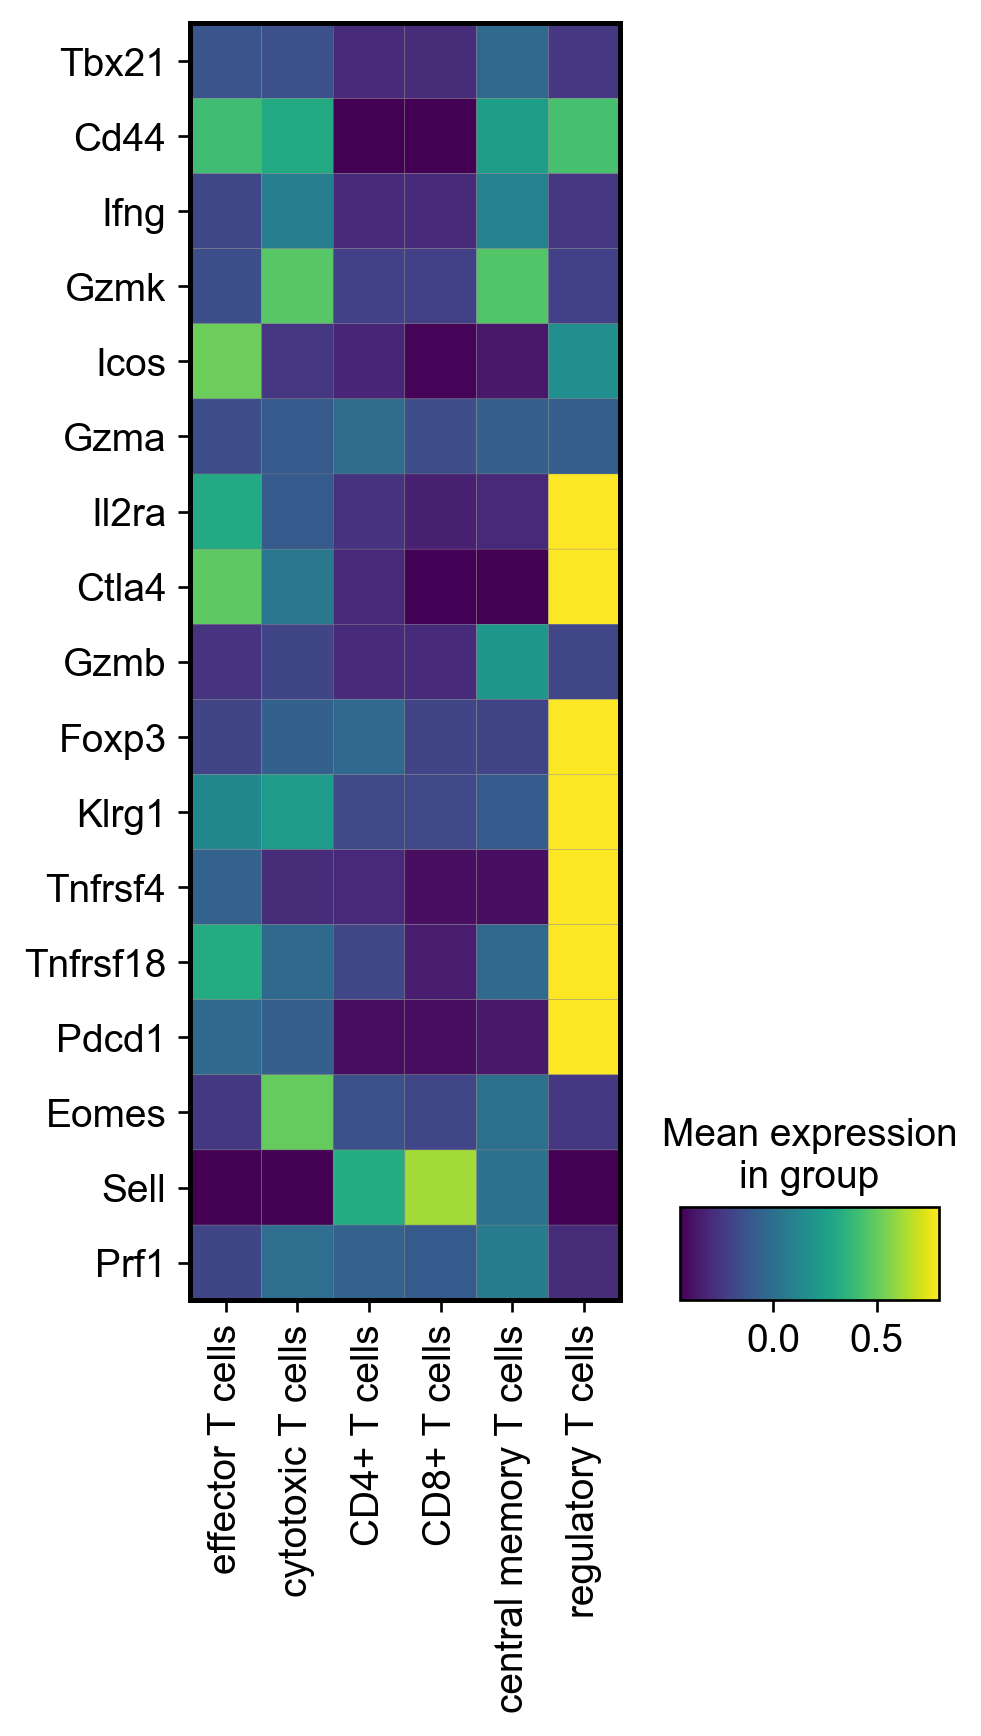

In [146]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='8661_ctrl',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='8661_Cd8Tcell_markers_ctrl',vmin=-0.45,vmax=0.8)

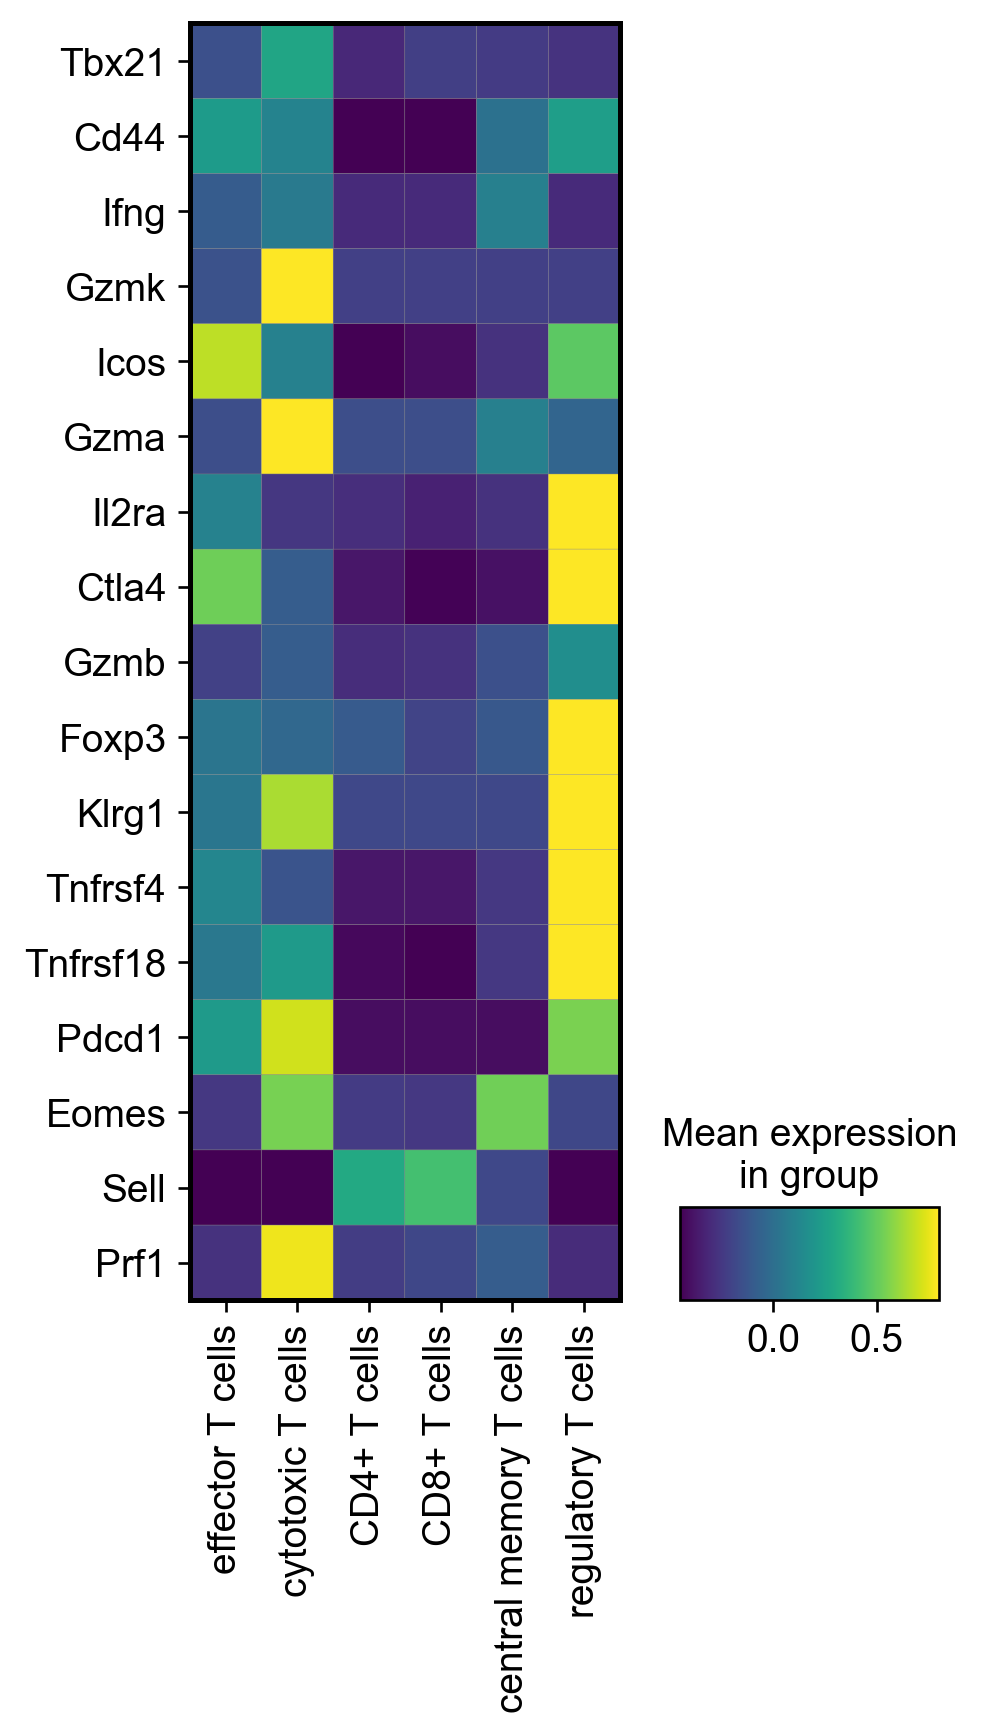

In [147]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='8661_T/N',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='8661_Cd8Tcell_markers_treat_N_T',vmin=-0.45,vmax=0.8)

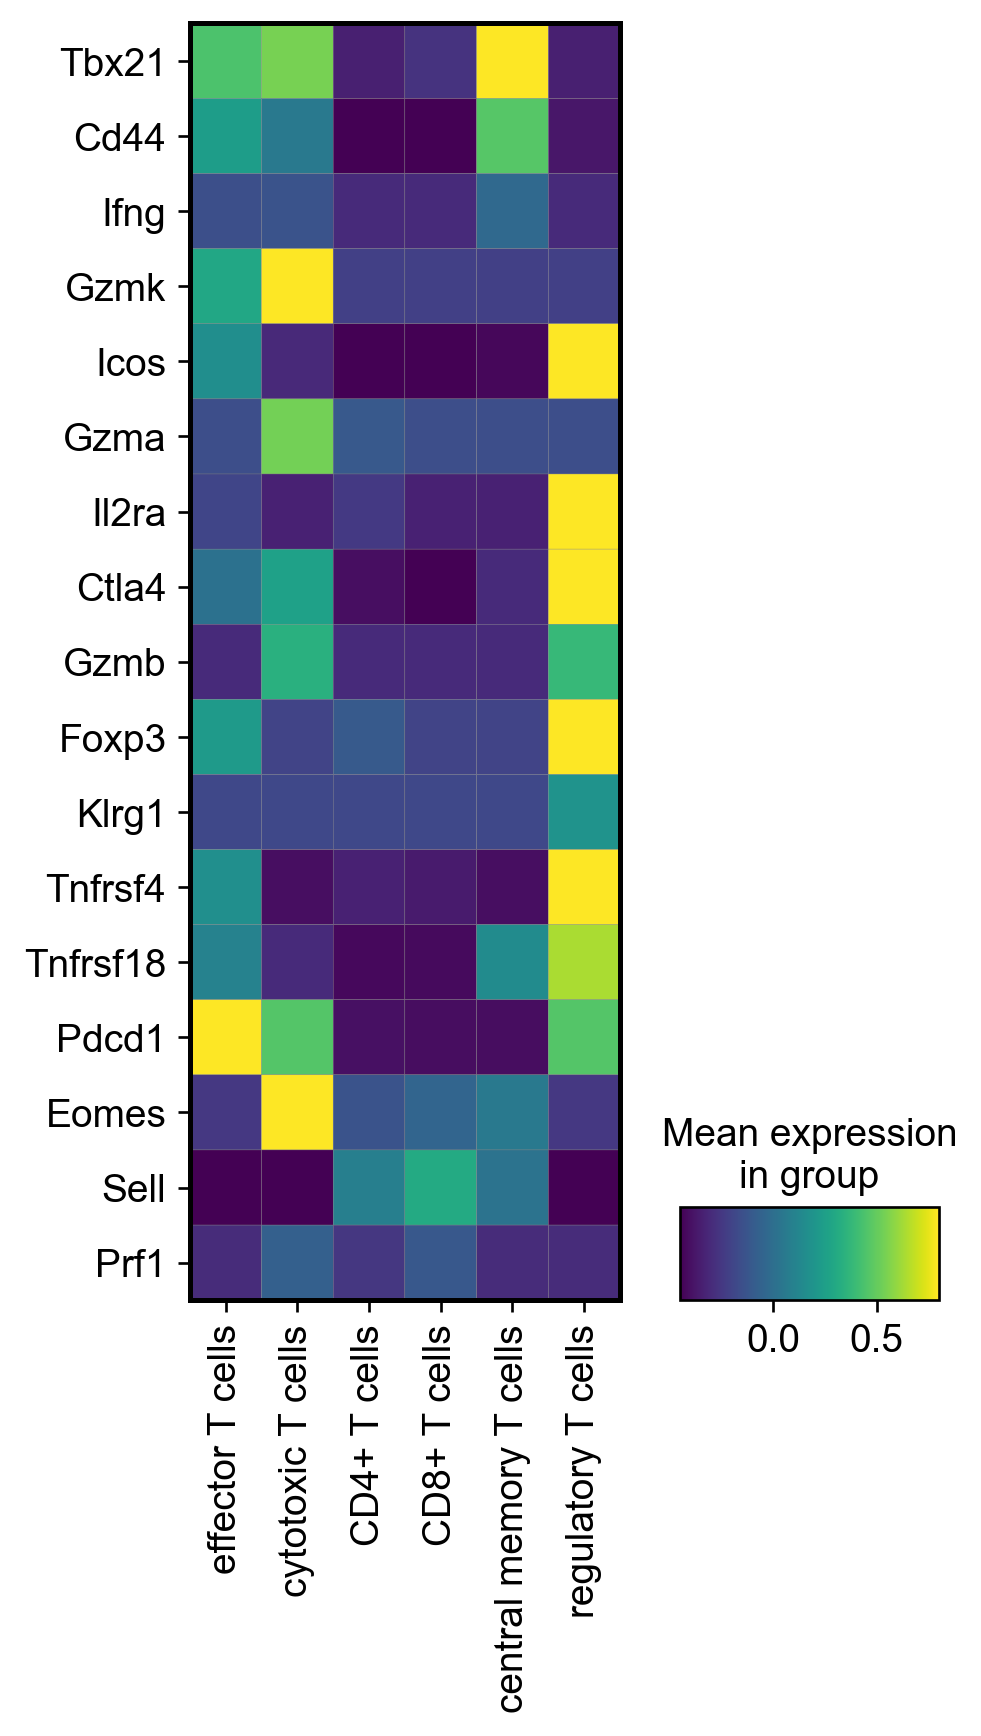

In [148]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='8661_T/N+aPDL1',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='8661_Cd8Tcell_markers_treat_N_T_aPDL1',vmin=-0.45,vmax=0.8)

Mesenchymal

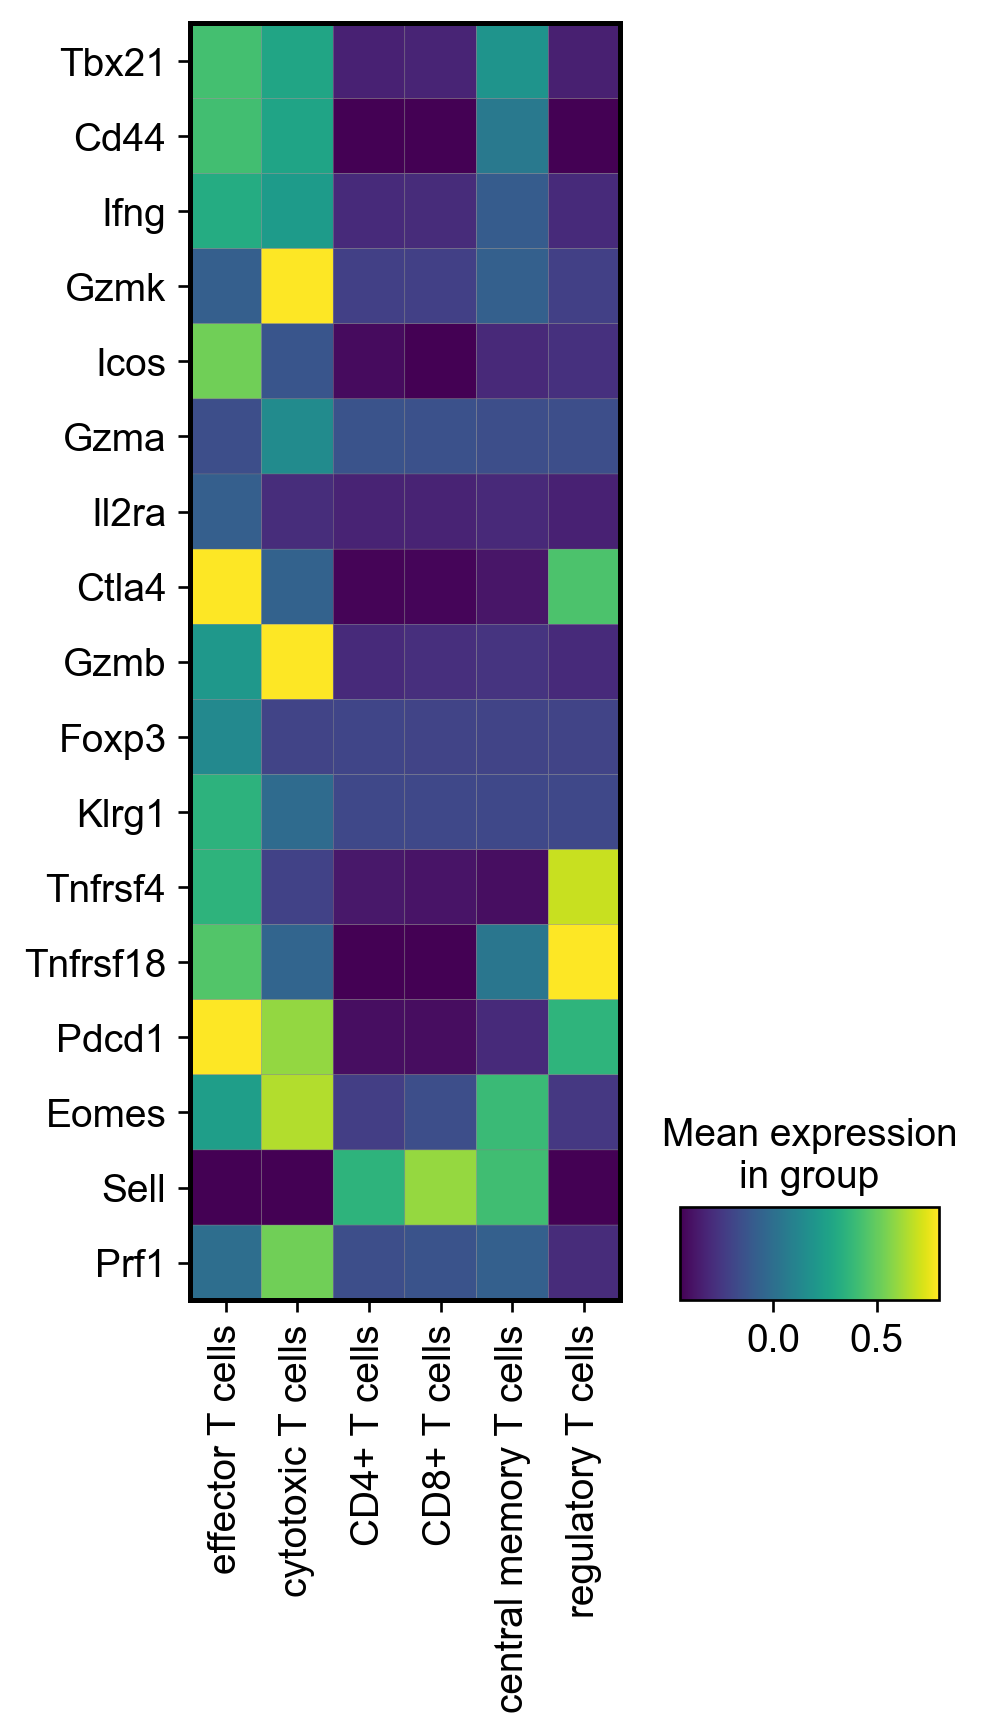

In [149]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='9091_ctrl',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='9091_Cd8Tcell_markers_ctrl',vmin=-0.45,vmax=0.8)

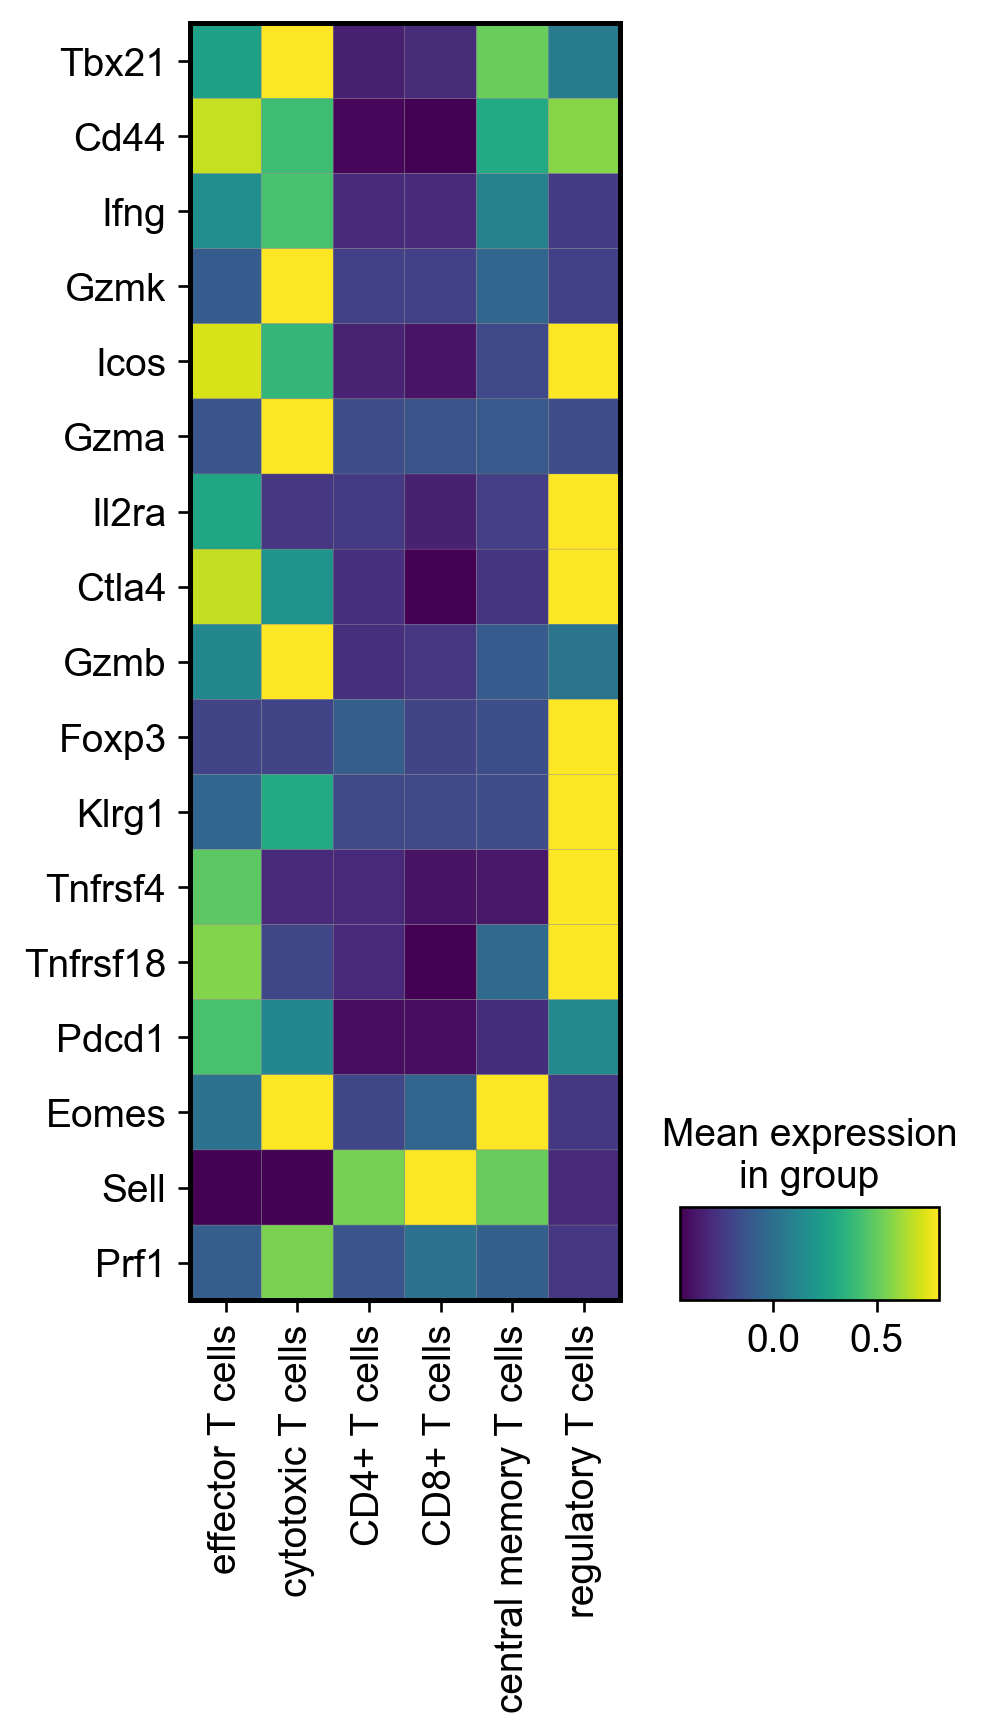

In [150]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='9091_T/N',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='9091_Cd8Tcell_markers_treat_N_T',vmin=-0.45,vmax=0.8)

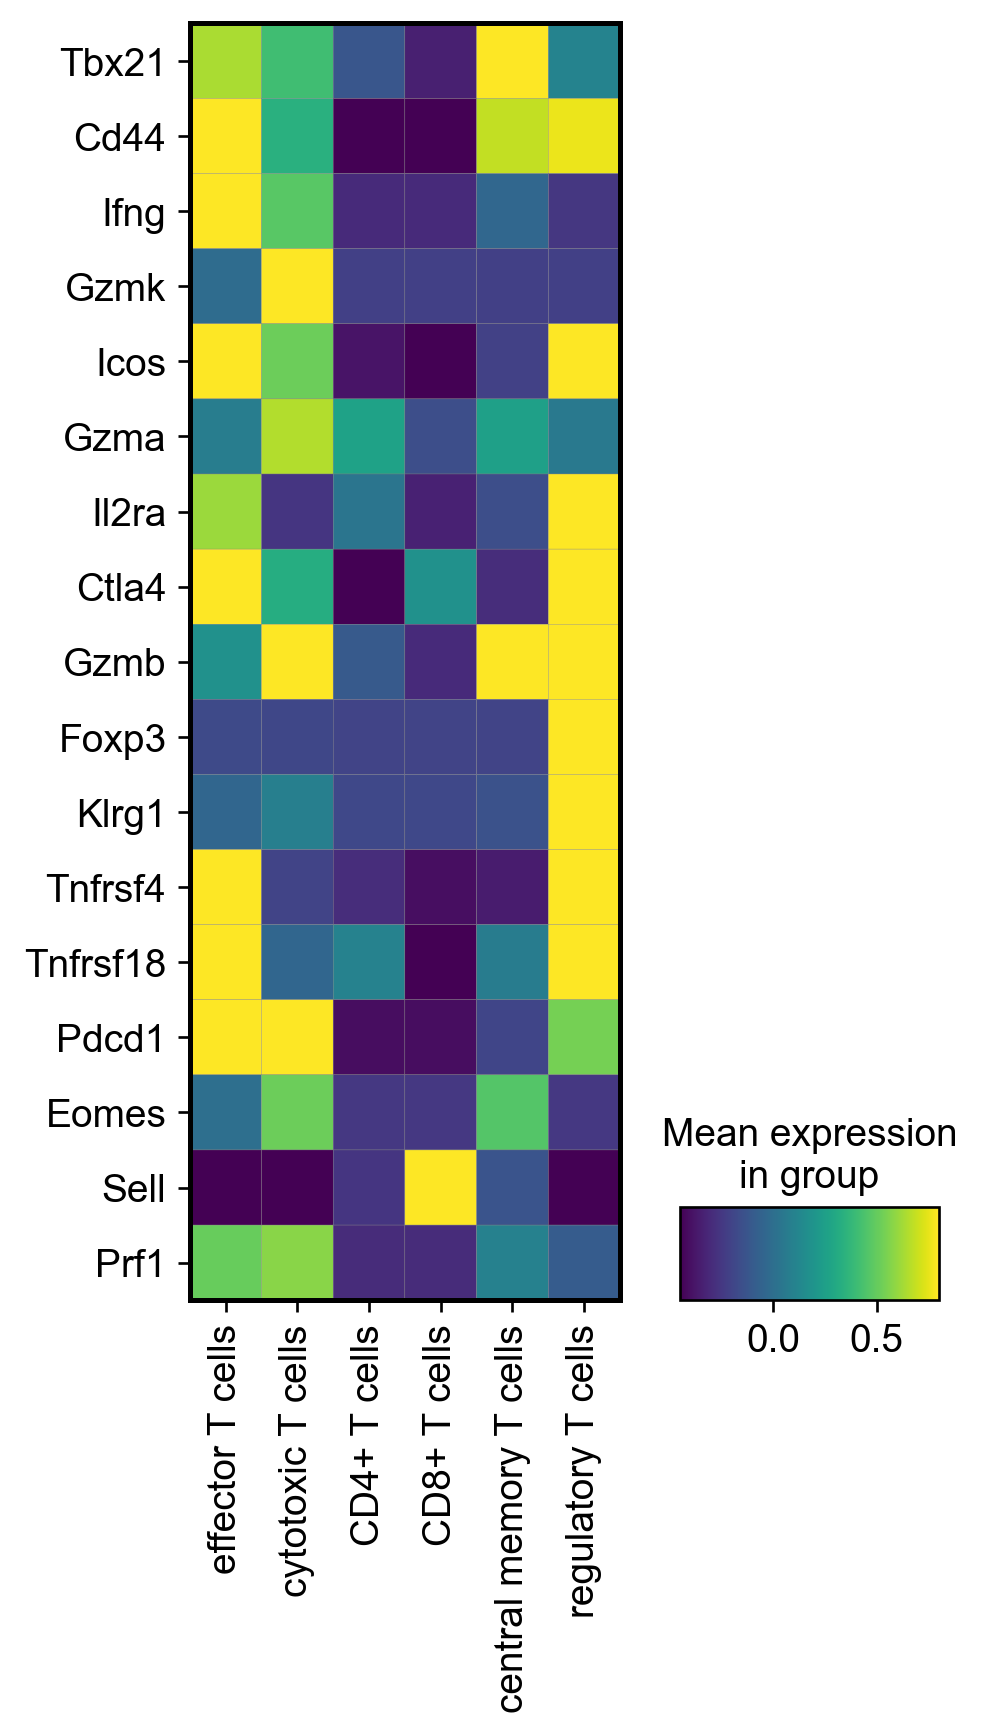

In [151]:
sc.pl.matrixplot(adata[adata.obs['samples2']=='9091_T/N+aPDL1',:], Cd4_8_Markers, groupby='annotated', figsize=(4,7),
                 layer='scaled',swap_axes=True, save='9091_Cd8Tcell_markers_treat_N_T_aPDL1',vmin=-0.45,vmax=0.8)